In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Defining System Model

In [9]:
fs =100 # Hz
g = 9.81 # m/s^2
T = 1/fs # s
L = 2.269 # m

# [vx, vy, vz, ax, ay, az, yaw, steering angle]T
X_matrix = np.zeros((7,1))
                    #
A_matrix = np.array([[1, 0, 0, 0, 0, 0, 0], # x
                     [0, 1, 0, 0, 0, 0, 0], # y
                     [0, 0, 0, 0, 0, 0, 0], # Vx
                     [0, 0, 0, 0, 0, 0, 0], # Vy
                     [0, 0, 0, 0, 1, 0, 0], # heading
                     [0, 0, 0, 0, 0, 0, 0], # heading rate
                     [0, 0, 0, 0, 0, 0, 0]]) # Steering angle

B_matrix = np.array([[0, 0, 0],
                     [T, 0, 0],
                     [0, 0, 0],
                     [1, 0, 0],
                     [0, T, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

U_matrix = np.zeros((3,1))

## Validating Vx and Vy, Yaw, Yaw_dot & Steering Angle


In [10]:
X_matrix = np.zeros((7,1))

t = np.linspace(0, 10, 200)

vd = 20
phi = 20
heading_rate = ( vd * math.tan(np.deg2rad(phi)) ) / L

U_matrix[0,0] = vd
U_matrix[1,0] = heading_rate
U_matrix[2,0] = np.deg2rad(phi)


vx = np.zeros_like(t)
vy = np.zeros_like(t)
yaw = np.zeros_like(t)
yaw_dot = np.zeros_like(t)
steering_angle = np.zeros_like(t)

for i in range(len(t)):
    X_matrix = np.matmul(A_matrix,X_matrix) + np.matmul(B_matrix,U_matrix)

    # Inputs
    U_matrix[0,0] = vd
    U_matrix[1,0] = heading_rate
    U_matrix[2,0] = np.deg2rad(phi)

    vx[i] = X_matrix[2,0]
    vy[i] = X_matrix[3,0]
    yaw[i] = np.rad2deg(X_matrix[4,0])
    yaw_dot[i] = X_matrix[5,0]
    steering_angle[i] = np.rad2deg(X_matrix[6,0])

In [11]:
# Transform Body Frame to Global Frame
for i in range(1,len(t)):
    vx[i] = vy[i] * math.sin(np.deg2rad(yaw[i]))
    vy[i] = vy[i] * math.cos(np.deg2rad(yaw[i]))

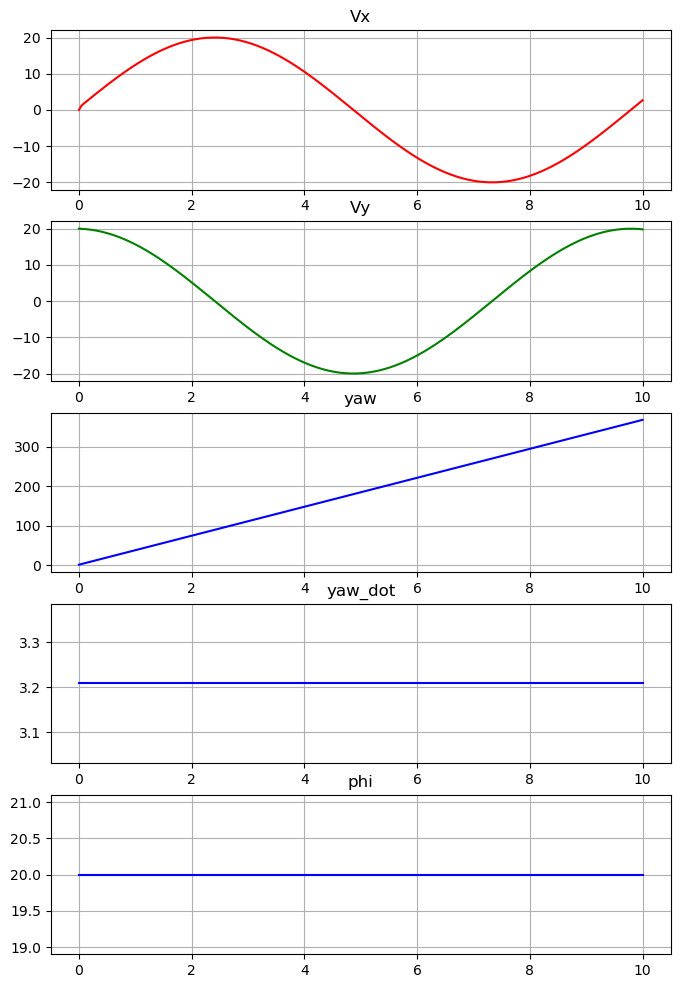

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(8, 12))

axs[0].plot(t, vx, color='r')
axs[0].set_title('Vx')
axs[0].grid()

axs[1].plot(t, vy, color='g')
axs[1].set_title('Vy')
axs[1].grid()

axs[2].plot(t, yaw, color='b')
axs[2].set_title('yaw')
axs[2].grid()

axs[3].plot(t, yaw_dot, color='b')
axs[3].set_title('yaw_dot')
axs[3].grid()

axs[4].plot(t, steering_angle, color='b')
axs[4].set_title('phi')
axs[4].grid()

plt.show()

# Integrate Vx and Vy to see if the path makes sense

In [13]:
delta_t = t[1]
x = np.zeros_like(t)
y = np.zeros_like(t)

for i in range(1,len(t)):
    x[i] = x[i-1] + 0.5*delta_t*(vx[i-1]+vx[i])
    y[i] = y[i-1] + 0.5*delta_t*(vy[i-1]+vy[i])

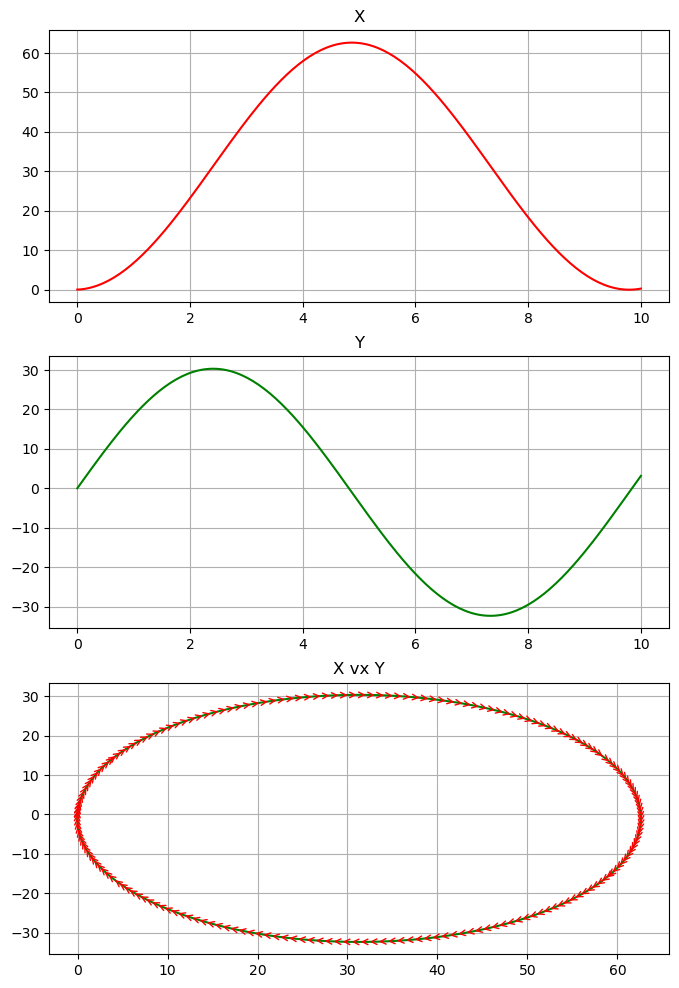

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(t, x, color='r')
axs[0].set_title('X')
axs[0].grid()

axs[1].plot(t, y, color='g')
axs[1].set_title('Y')
axs[1].grid()

axs[2].plot(x, y, color='g')
axs[2].set_title('X vx Y')
axs[2].grid()

for i in range(len(t) - 1):
    axs[2].annotate("", xy=(x[i + 1], y[i + 1]), xytext=(x[i], y[i]),
                    arrowprops=dict(arrowstyle="->", color='r', lw=1),
                    )

plt.show()